# Data Storry Telling - ECB Rates

In this project I will explicitly work on my data-visualization skills, focusing on historical european central bank (ECB) rates.

- Goal: Analyze ECB Data Set containing historical exchange rates between many different currencies. 
- I will focus on the EURO-USD exchange rate. 
- I want to take a closer look at:
    - impact of the 2008 financial crisis
    - impact of the last three US presidents (Bush, Obama, Trump)

In [56]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

import warnings
warnings.simplefilter("ignore", UserWarning)

### Read the data undertake some basic cleaning:
- `USD` column has a weird name - I'll change it to `USD_dollar` for my convenience
- the time columns also has weird name, I'll change it to `Time`
- `Time` column needs to be turned into pandas datatime object
- finally I sorted the `Time` column in descending order

In [15]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv') # read in the data

# rename USD column + change period column and turn into datetime
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True) 
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time']) # turn into datetime object
exchange_rates.sort_values('Time', inplace=True) # sort from old to new
exchange_rates.reset_index(drop=True, inplace=True) # reset index
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


### Now I isolated the EURO-USD exchange rate
- the new dataframe is called `euro_to_dollar`
- the `US_dollar` column contained some entries with '-'
- thus, I removed all these rows and transformed the `US_dollar` column to float
- to smooth the data I decided to calculate the 30-day rolling mean of the exchange rates

In [17]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy() # copy time and usd columns
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-'] # remove '-' data entries
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float) # revert to float

# calculate rolling mean, rolling window of 30 days
euro_to_dollar['rolling_mean_USD_30'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.tail(10)

,Time,US_dollar,rolling_mean_USD_30
5982,2022-02-14,1.1316,1.133480
5983,2022-02-15,1.1345,1.133700
5984,2022-02-16,1.1372,1.133877
5985,2022-02-17,1.1370,1.134060
5986,2022-02-18,1.1354,1.134247
5987,2022-02-21,1.1338,1.134313
5988,2022-02-22,1.1342,1.134333
5989,2022-02-23,1.1344,1.134247
5990,2022-02-24,1.1163,1.133247
5991,2022-02-25,1.1216,1.132477


### The chart below shows all the data available to gain a first feeling:

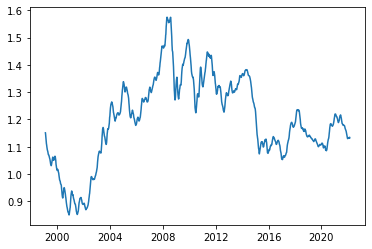

In [10]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean_USD_30'])
plt.show()

## Now, I want to highlight the impact of the 2008 financial crisis, using the following steps:
- isolate the 2007 - 2008 data and save to `df_crisis`
- also show the data for 2006 `df_06`

In [11]:
# df_crisis = data from 2007 to 2008
df_crisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006) & (euro_to_dollar['Time'].dt.year <= 2009)]
# df_06 = 2006 data
df_06 = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006) & (euro_to_dollar['Time'].dt.year <= 2006)]
# df_08 = 2008 data
df_07 = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2007) & (euro_to_dollar['Time'].dt.year <= 2008)]
df_07.head()

,Time,US_dollar,rolling_mean_USD_30
2086,2007-01-02,1.3270,1.314257
2087,2007-01-03,1.3231,1.315780
2088,2007-01-04,1.3106,1.316663
2089,2007-01-05,1.3084,1.317563
2090,2007-01-08,1.3006,1.317963


#### Plotscript to highlight exchange rates during financial crisis:

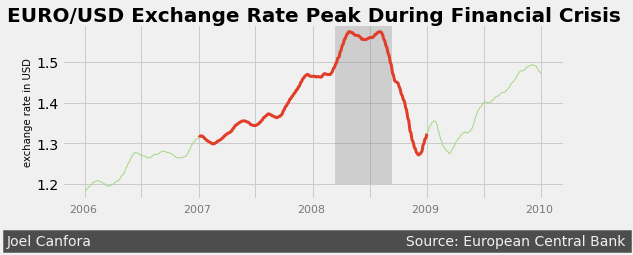

In [182]:
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(df_crisis['Time'], df_crisis['rolling_mean_USD_30'],linewidth=1, color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(df_07['Time'], df_07['rolling_mean_USD_30'], linewidth=3, color='#e23d28')

ax.axvspan(xmin=13950.0, xmax=14130.0, ymin=0.09,alpha=0.3, color='grey')

### Adding separate tick labels
ax.set_xticklabels([])
#ax.set_yticklabels([])

x = 13100.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365
    
plt.ylabel('exchange rate in USD', fontsize=10)
#plt.title('EURO/USD Exchange Rate Peak During Financial Crisis', fontsize = 15)

# title
plt.text(12900.0, 1.6, 'EURO/USD Exchange Rate Peak During Financial Crisis',fontsize=20, weight='bold')

# signature
plt.text(12900.0, 1.05, 'Joel Canfora' + ' '*70 + 'Source: European Central Bank', \
         color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=14)
plt.show()

## Now I want to highlight the Impact of the last three Presidencies:

How did the euro-dollar rate change under:
- George W. Bush 2001-2009
- Barack Obama 2009-2017
- Donald Trump 2017-2021

In [41]:
# isolate the exchange rates accordint to the three different presidential terms:

df_bush = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year <= 2009)]
df_obama = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2010) & (euro_to_dollar['Time'].dt.year <= 2017)]
df_trump = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2018) & (euro_to_dollar['Time'].dt.year <= 2021)]
df_total = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year <= 2021)]
df_total.head()

,Time,US_dollar,rolling_mean_USD_30
521,2001-01-02,0.9423,0.883343
522,2001-01-03,0.9530,0.886660
523,2001-01-04,0.9458,0.889893
524,2001-01-05,0.9545,0.893463
525,2001-01-08,0.9497,0.897023


### plotscript to highlight echange rates for different presidential terms

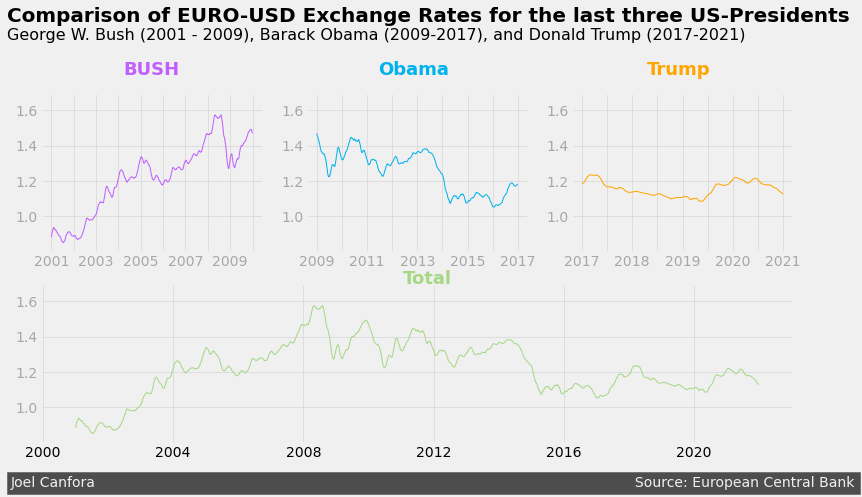

In [155]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1) # bush plot
ax2 = plt.subplot(2,3,2) # obama plot
ax3 = plt.subplot(2,3,3) # trump plot
ax4 = plt.subplot(2,1,2) # all of the above in one plot
axes = [ax1, ax2, ax3, ax4] # list of subfigures

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7) # limit yaxis
    ax.set_yticks([1.0, 1.2, 1.4, 1.6]) # custom yticks
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],alpha=0.3)
    ax.grid(alpha=0.5) # custom grid
    
# bush plot
ax1.plot(df_bush['Time'], df_bush['rolling_mean_USD_30'],linewidth=1, color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '','2007', '', '2009'],alpha=0.3)
ax1.text(12500.0, 1.8, 'BUSH', fontsize=18, weight='bold', color='#BF5FFF')

# obama plot
ax2.plot(df_obama['Time'], df_obama['rolling_mean_USD_30'],linewidth=1, color='#00B2EE')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '','2015', '', '2017'],alpha=0.3)
ax2.text(15500.0, 1.8, 'Obama', fontsize=18, weight='bold', color='#00B2EE')

# trump plot
ax3.plot(df_trump['Time'], df_trump['rolling_mean_USD_30'],linewidth=1, color='#ffa500')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '','2020', '', '2021'],alpha=0.3)
ax3.text(18000.0, 1.8, 'Trump', fontsize=18, weight='bold', color='#ffa500')

# total plot
ax4.plot(df_total['Time'], df_total['rolling_mean_USD_30'],linewidth=1, color='#A6D785')
ax4.text(15000.0, 1.7, 'Total', fontsize=18, weight='bold', color='#A6D785')

### Adding a title and a subtitle
ax1.text(10600.0, 2.1, 'Comparison of EURO-USD Exchange Rates for the last three US-Presidents',\
         fontsize=20, weight='bold')
ax1.text(10600.0, 2, '''George W. Bush (2001 - 2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)''',\
         fontsize=16)

### Adding a signature
ax4.text(10600.0, 0.55, 'Joel Canfora' + ' '*120 + 'Source: European Central Bank', color = '#f0f0f0',\
         backgroundcolor = '#4d4d4d', size=14)

plt.show()

# Conclusion:
- The EURO-USD exchange rate spiked during the 2008 financial crisis (well above 1.5)
- under Bush it trended upwords (below 1.0 to 1.5)
- under Obame EURO-USD exchange rate chooped sideways/down (1.5 go 1.2)
- under trump it stayed fairely constant (roughly 1.2)


# Further Project Ideas:
- influence of covid on the exchange rates
- influence of Ukraine War